Epoch 1/3500
2/2 [==============================] - 1s 176ms/step - loss: 0.7844 - accuracy: 0.7596 - val_loss: 0.5725 - val_accuracy: 0.7795

Epoch 00001: val_loss improved from inf to 0.57246, saving model to ./model/01-0.5725.hdf5
Epoch 2/3500
2/2 [==============================] - 0s 20ms/step - loss: 0.5981 - accuracy: 0.7642 - val_loss: 0.4143 - val_accuracy: 0.7826

Epoch 00002: val_loss improved from 0.57246 to 0.41434, saving model to ./model/02-0.4143.hdf5
Epoch 3/3500
2/2 [==============================] - 0s 29ms/step - loss: 0.4410 - accuracy: 0.7718 - val_loss: 0.3250 - val_accuracy: 0.7950

Epoch 00003: val_loss improved from 0.41434 to 0.32497, saving model to ./model/03-0.3250.hdf5
Epoch 4/3500
2/2 [==============================] - 0s 23ms/step - loss: 0.3739 - accuracy: 0.7734 - val_loss: 0.3308 - val_accuracy: 0.8416

Epoch 00004: val_loss did not improve from 0.32497
Epoch 5/3500
2/2 [==============================] - 0s 24ms/step - loss: 0.3827 - accuracy: 0.8101 

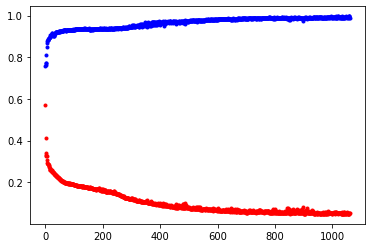

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df_pre = pd.read_csv("/wine.csv", header=None)
df = df_pre.sample(frac=0.15)

#데이터 분류
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

#모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#모델 실행
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback,checkpointer])

#결과 출력
print("\n Accuracy : %.2f%%" % (model.evaluate(X, Y)[1]*100))

#y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

그래프로 확인하기 - 예제
- iris.csv를 사용해서 accuracy와 loss그래프 그려보기
- 그래프를 통해 아이리스 데이터에서 과적합이 일어나는지 확인
- sample() 쓰지 말고 그냥 전체 데이터로
- Epoch가 작을때와 클 때 비교해보기
- Epoch 100, batch_size 10(필수)
- validation_spilt=0.33(필수)

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 2.5030 - accuracy: 0.3600 - val_loss: 2.4839 - val_accuracy: 0.2800

Epoch 00001: val_loss improved from inf to 2.48389, saving model to ./model/01-2.4839.hdf5
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 2.2307 - accuracy: 0.3600 - val_loss: 2.2013 - val_accuracy: 0.2800

Epoch 00002: val_loss improved from 2.48389 to 2.20132, saving model to ./model/02-2.2013.hdf5
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9592 - accuracy: 0.3600 - val_loss: 1.9029 - val_accuracy: 0.2800

Epoch 00003: val_loss improved from 2.20132 to 1.90293, saving model to ./model/03-1.9029.hdf5
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1.6807 - accuracy: 0.3800 - val_loss: 1.6099 - val_accuracy: 0.4400

Epoch 00004: val_loss improved from 1.90293 to 1.60992, saving model to ./model/04-1.6099.hdf5
Epoch 5/100
10/10 [==============================] - 0s

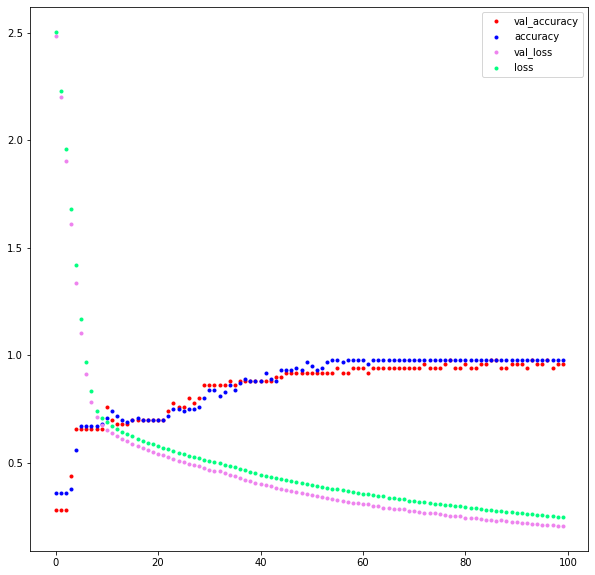

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df = pd.read_csv("/iris.csv", header=None)
df = df.sample(frac=1)

#데이터 분류
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

#문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

#모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

#모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#자동 중단 설정
#early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#모델 실행
history = model.fit(X, Y_encoded, validation_split=0.33, epochs=100, batch_size=10, callbacks=[early_stopping_callback,checkpointer])
#카테고리가 3개인데 뒤에서 30%만 받는다. 즉 정보가 없는걸 계산해야되는 상황이 옴
#이렇게 할거면  sample을 이용해서 섞어줘야 그래프가 잘 나온다

#결과 출력
print("\n Accuracy : %.2f%%" % (model.evaluate(X, Y_encoded)[1]*100))

#y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']

#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']
y_loss = history.history['loss']

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(10,10))
plt.plot(x_len, y_vacc, "o", c="red", markersize=3, label='val_accuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='accuracy')
plt.plot(x_len, y_vloss, "o", c="violet", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="springgreen", markersize=3, label='loss')

plt.legend()

plt.show()